## 1/ Giới thiệu CVXPY

### a) Tổng quan:

CVXPY  là một thư viện (mở) Python, chuyên cho việc giải các bài toán quy hoạch tuyến tính lồi.    
Một trong những thế mạnh của thư viện CVXPY là nó cho phép biểu diễn các bài toán quy hoạch tuyến tính dễ dàng theo ngôn ngữ toán học thay vì gò bó trong cú pháp toán của Python   
  
Một ví dụ sử dụng CVXPY (source: CVXPY doc)  
```python
import cvxpy as cp
import numpy as np

# Các dữ liệu điều kiện bài toán
m = 30
n = 20
np.random.seed(1)
# Tạo random ma trận A và vectơ b cho bài toán tối ưu
A = np.random.randn(m, n) # Ma trận A(m x n)
b = np.random.randn(m) # Vectơ b (m)

# Khởi tạo bài toán
x = cp.Variable(n) # Tạo vectơ biến x
objective = cp.Minimize(cp.sum_squares(A @ x - b)) # Tạo hàm mục tiêu
constraints = [0 <= x, x <= 1] # Tạo các điều kiện ràng buộc
prob = cp.Problem(objective, constraints) # Cho tất cả các điều kiện trên vào bài toán

# Giải bài toán tối ưu
result = prob.solve()
# Các giá trị 'x' tối ưu sẽ nằm trong cú pháp x.value
print(x.value)
# Giá trị Lagrange tối ưu cho các ràng buộc sẽ nằm trong  `constraint.dual_value`.
print(constraints[0].dual_value)
```

In [10]:
import cvxpy as cp
import numpy as np

# Các dữ liệu điều kiện bài toán
m = 30
n = 20
np.random.seed(1)
# Tạo random ma trận A và vectơ b cho bài toán tối ưu
A = np.random.randn(m, n) # Ma trận A(m x n)
b = np.random.randn(m) # Vectơ b (m)

x = cp.Variable(n) # Tạo vectơ biến x
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# Giải bài toán tối ưu
result = prob.solve()
x.value

array([-1.79109255e-19,  2.85112420e-02,  2.79973443e-19,  3.37658729e-20,
       -2.72802663e-19,  1.49285011e-01, -9.94082533e-20,  8.35373900e-20,
        2.46718649e-01,  5.78224144e-01, -4.03739463e-19,  1.01242860e-03,
       -9.28486180e-20,  2.26767464e-01, -1.58813678e-19, -8.97232272e-20,
       -1.22145729e-19, -1.51509428e-19,  1.12060672e-19, -3.48318635e-19])

### b) Các ví dụ

#### Bài toán Least Square

Bài toán Least Square (Error) là một trong những bài toán phổ biến nhất của ML. Có thể mô tả bài toán là vẽ 1 đường thẳng qua tập hợp các điểm sao cho khoảng cách giữa các điểm đến đường thẳng đó là bé nhất (line of best fit).  

Bài toán Least Square có những thành phần như sau:  
* Dataset $A \in \mathbb{R}^{m \times n}$ có n cột tương đương với n feature (đặc tính), và m dòng tương đương với m mẫu data  
* Vectơ $b \in \mathbb{R}^m$ tương đương với m label  
Bài toán sẽ là:  
Tìm giá trị nhỏ nhất cho: $\| Ax - b \|$  
Gọi $x^*$ là giá trị tối ưu cho bài toán, gọi số dư r là kết quả của bài $r = Ax^* -b $. Bài toán đạt giá trị tối ưu khi $r = 0$  

Chạy bài toán Least Square trong CVXPY:


In [1]:
# Import các thư viện
import cvxpy as cp
import numpy as np

# Tạo các dữ kiện bài toán
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Tạo bài toán trên CVXPY và giải bài toán
x = cp.Variable(n) # Khai báo biến x
cost = cp.sum_squares(A @ x - b) # Định dạng bài toán là least square
prob = cp.Problem(cp.Minimize(cost)) # Cho bài toán vào CVXPY để giải
prob.solve() # Giải bài toán

# In ra các kết quả
print("\nGiá trị tối ưu là", prob.value)
print("Giá trị x tối ưu là")
print(x.value)
print("Giá trị số dư là", cp.norm(A @ x - b, p=2).value)


Giá trị tối ưu là 7.005909828287485
Giá trị x tối ưu là
[ 0.17492418 -0.38102551  0.34732251  0.0173098  -0.0845784  -0.08134019
  0.293119    0.27019762  0.17493179 -0.23953449  0.64097935 -0.41633637
  0.12799688  0.1063942  -0.32158411]
Giá trị số dư là 2.6468679280023557


#### Bài toán quy hoạch tuyến tính

Bài toán quy hoạch tuyến tính gồm những thành phần:  
$$
minimize \, c^Tx \\
s.t \, Ax \leq b \\
A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m, c \in \mathbb{R}^n
$$  
Ngoài giá trị tối ưu cho bài toán $x^*$, CVXPY còn có một đáp án $\lambda^*$ gọi là dual solution. Trong vector $\lambda^*$, các vị trí i có giá trí $>0$ sẽ có ý nghĩa là: $a_i^Tx \leq b$ với giá trị tối ưu $x^*$ thì khi $b$ thay đổi sẽ làm $x^*$ thay đổi  

Chạy bài toán quy hoạch tuyến tính trên CVXPY  

In [2]:
# Import các thư viện
import cvxpy as cp
import numpy as np

# Tạo các dữ kiện bài toán
m = 15
n = 10
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A @ x0 + s0
c = -A.T @ lamb0



# Tạo bài toán trên CVXPY và giải bài toán
x = cp.Variable(n) # Khai báo biến x
# Cho bài toán và các điều kiện ràng buộc vào CVXPY
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A @ x <= b])
prob.solve() # Giải bài toán

# Print result.s
print("\nGiá trị tối ưu là", prob.value)
print("Nghiệm x tối ưu là")
print(x.value)
print("Nghiệm dual solution là")
print(prob.constraints[0].dual_value)


Giá trị tối ưu là -15.220912604404832
Nghiệm x tối ưu là
[-1.1015836  -0.16207264 -0.90072437  0.03042621  0.61108486 -1.13141957
  1.1270734   0.87833368  0.48871908  0.89807117]
Nghiệm dual solution là
[2.45894208e-09 6.11756417e-01 5.28171745e-01 1.07296862e+00
 6.38551602e-09 2.30153871e+00 1.12756160e-09 7.61206895e-01
 1.31943038e-08 2.49370376e-01 2.02551464e-09 2.06014070e+00
 3.22417209e-01 3.84054335e-01 2.94504008e-09]


#### Bài toán ML: Hồi quy Ridge

Ridge regression là một bài toán được xây dựng dựa trên bài Linear Regression, với hàm mục tiêu tương tự như Linear Regression nhưng thêm vào một điều kiện (penalty) $\mathcal{l}_2$ trên tham số $\beta$ của hàm mục tiêu. Hàm mục tiêu của Ridge Regression trở thành:  
$$minimize \,\,\, f(\beta) = \|X\beta - Y \|^2_2 + \lambda \|A\|^2_2$$
với $\lambda$ là hyperparameter, $X$ là training data và $Y$ là các label. Trong thực tế thì chúng ta sẽ điều chỉnh giá trị $\lambda$ sao cho bài toán tối ưu.  

Thực hiện bài toán Ridge Regression trong CVXPY

Import các thư viện

In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

Quy định các hàm mục tiêu

In [4]:
# Thành phần 1 của hàm mục tiêu
def loss_fn(X, Y, beta):
    return cp.pnorm(X @ beta - Y, p=2)**2

# Điều kiện l2cal
def regularizer(beta):
    return cp.pnorm(beta, p=2)**2

# Hàm mục tiêu
def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

# mean square error
def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

Tạo data cho bài toán, và chia thành train và test

In [5]:
def generate_data(m=100, n=20, sigma=5):
    "Generates data matrix X and observations Y."
    np.random.seed(1)
    beta_star = np.random.randn(n)
    # Generate an ill-conditioned data matrix
    X = np.random.randn(m, n)
    # Corrupt the observations with additive Gaussian noise
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y

m = 100
n = 20
sigma = 5

X, Y = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

Cho data vào model

/home/khoa-ys/Projects/venv_for_projects/bio_ml_venv/lib/python3.8/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


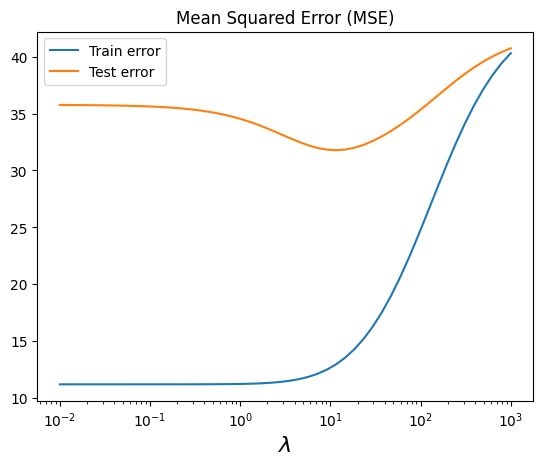

In [6]:
beta = cp.Variable(n) # Khai báo biến Beta
lambd = cp.Parameter(nonneg=True) # Khai báo tham số lambda
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd))) #Khai báo bài toán

lambd_values = np.logspace(-2, 3, 50) # Tạo nhiều giá trị lambda khác nhau để thử
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve() # Giải bài toán trên các giá trị lambda đã tạo
    train_errors.append(mse(X_train, Y_train, beta)) # Tính train loss của bài toán đã giải
    test_errors.append(mse(X_test, Y_test, beta)) # Tính test loss của bài toán đã giải
    beta_values.append(beta.value) # Giá trị Beta của bài toán

# Đánh giá kết quả bài toán
def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, lambd_values)

#### Bài toán ML: Hồi quy Logistic

Hồi quy Logistic là một trong những model ML cơ bản dùng cho binary classification (phân loại nhị phân).  
Mục tiêu của bài toán là tạo được một đường thẳng phân loại được data thành 2 sao cho: $$\hat{y} = \mathbb{1}[\beta^Tx > 0 ]$$ bằng 1 khi $\beta^Tx > 0$ và còn lại bằng 0. Vì vậy, chúng ta có thể viết $\beta^Tx$ dưới dạng:  
$log \frac{Pr(Y = 1 | X=x)}{Pr(Y = 0 | X=x} = \beta^Tx$.  

Hàm mục tiêu của Logistic Regression sẽ là maximize:  
$
\mathcal{l}(\beta) = \sum^m_{i=1}y_i\beta^Tx_i - log(1 + exp(\beta^Tx_i)) - \lambda \|\beta\|_1
$. Vì $\mathcal{l}$ là hàm lõm của $\beta$, bài toán quy hoạch trên hàm lồi.  
  
Giải bài toán Logistic Regression trên CVXPY

Import các thư viện

In [7]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

Tạo data và chia thành train, test

In [8]:
np.random.seed(1)
n = 50
m = 50
def sigmoid(z):
  return 1/(1 + np.exp(-z))

beta_true = np.array([1, 0.5, -0.5] + [0]*(n - 3))
X = (np.random.random((m, n)) - 0.5)*10
Y = np.round(sigmoid(X @ beta_true + np.random.randn(m)*0.5))

X_test = (np.random.random((2*m, n)) - 0.5)*10
Y_test = np.round(sigmoid(X_test @ beta_true + np.random.randn(2*m)*0.5))

Tạo bài toán trên CVXPY

In [9]:
beta = cp.Variable(n) # Khai báo biến beta
lambd = cp.Parameter(nonneg=True) # Khai báo tham số lambda
log_likelihood = cp.sum(
    cp.multiply(Y, X @ beta) - cp.logistic(X @ beta)
) # Tạo hàm mục tiêu
problem = cp.Problem(cp.Maximize(log_likelihood/m - lambd * cp.norm(beta, 1))) #Tạo bài toán trên CVXPY

# Hàm tính error
def error(scores, labels):
  scores[scores > 0] = 1
  scores[scores <= 0] = 0
  return np.sum(np.abs(scores - labels)) / float(np.size(labels))

Giải bài toán

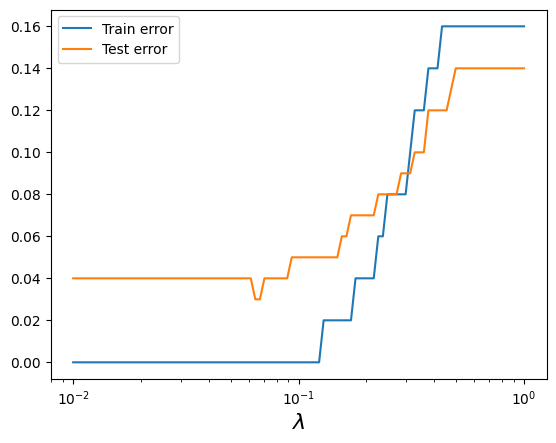

In [10]:
trials = 100
train_error = np.zeros(trials)
test_error = np.zeros(trials)
lambda_vals = np.logspace(-2, 0, trials) # Tạo 100 giá trị lambda khác nhau để thử trên bài toán
beta_vals = []
for i in range(trials):
    lambd.value = lambda_vals[i] # Thay giá trị lambda tương ứng vào tham số lambda trong bài toán
    problem.solve() # Giải bài toán
    train_error[i] = error( (X @ beta).value, Y) # Tính error của bài toán đã giải trên train set
    test_error[i] = error( (X_test @ beta).value, Y_test) # Tính error của bài toán đã giải trên test set
    beta_vals.append(beta.value) # Lưu các giá trị beta

# Đánh giá kết quả
plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale("log")
plt.legend(loc="upper left")
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()

## 2/ Bài tập
Giải các bài tập bằng CVXPY

### a)
Một công ty phải quyết định mức sản xuất cho 4 tháng sắp tới. Nhu cầu cho những tháng đó lần lượt là 900, 1100, 1700 và 1300 đơn vị. Sản lượng tối đa mỗi tháng là 1200 đơn vị. Vật liệu sản xuất trong một tháng có thể được giao trong tháng đó hoặc được lưu trữ trong kho và giao vào một tháng khác. Chi phí cho công ty là \$3 để giữ một đơn vị trong kho từ một tháng sang tháng tiếp theo. Nếu làm thêm giờ làm việc, công ty có thể sản xuất thêm tối đa 400 đơn vị mỗi tháng nhưng trong trường hợp này, công ty phải chi trả \$7 mỗi đơn vị. Hãy sắp xếp vấn đề xác định mức sản xuất sao cho chi phí tổng cộng là nhỏ nhất dưới dạng phương trình tuyến tính

In [11]:
# Import các thư viện

# TODO: Nhập các dữ kiện bài toán vào các ma trận A, vectơ b và vectơ c tương ứng

# TODO: Khai báo bài toán trên CVXPY

# TODO: Giải bài toán

# TODO: In ra kết quả

### b)
Bài toán: mang các bánh croissants từ các tiệm bánh đến các quán cafe ở Manhattan sao cho tối ưu được lượng bán bán ra cũng như giao hàng được một cách tối ưu.   
  
Lưu ý: nếu gặp lỗi load data khi chạy trên Colab thì các em có thể mở trên VScode chạy ### b)

In [16]:
import numpy as np # always need it
import scipy as sp # often use it
import cvxpy as cp
import os

Bài toán: mang các bánh croissants từ các tiệm bánh đến các quán cafe ở Manhattan.

array([201.8163543 , 168.40784664, 288.12166576, 364.68282915,
       336.8424061 , 238.70491485, 375.12298779, 482.30861653])

In [17]:
data = np.load(os.path.abspath('manhattan.npz'))
bakery_pos = data['bakery_pos']
bakery_prod = data['bakery_prod']
cafe_pos = data['cafe_pos']
cafe_prod = data['cafe_prod']
Imap = data['Imap']
print('Số bánh nướng được ở từng tiệm bánh: {}'.format(bakery_prod))
print('Số bánh bán được ở từng cafe: {}'.format(cafe_prod))
print('Tổng số bánh bán được ở các quán cafe: {}'.format(cafe_prod.sum()))
print('Vị trí các tiệm bánh: {}'.format(bakery_pos))
print('Vị trí các tiệm cafe: {}'.format(cafe_pos))

# vẽ các tiệm cafe và bánh trên bản đồ.
# Kích cỡ của điểm tròn biểu thị sản lượng bánh được làm/bán
plt.figure()
plt.imshow(data['Imap'], interpolation='bilinear')
plt.scatter(bakery_pos[:,0], bakery_pos[:,1], color='b', s=bakery_prod)
plt.scatter(cafe_pos[:,0], cafe_pos[:,1], color='r', s=cafe_prod)
plt.legend(['Bakery', 'Cafe'])
plt.title('Manhattan Bakeries and Cafés')

Số bánh nướng được ở từng tiệm bánh: [31. 48. 82. 30. 40. 48. 89. 73.]
Số bánh bán được ở từng cafe: [82. 88. 92. 88. 91.]
Tổng số bánh bán được ở các quán cafe: 441.0
Vị trí các tiệm bánh: [[184.86464733 201.8163543 ]
 [449.3486663  168.40784664]
 [245.41756746 288.12166576]
 [273.95400109 364.68282915]
 [494.58935376 336.8424061 ]
 [738.19305545 238.70491485]
 [736.10502372 375.12298779]
 [537.74200949 482.30861653]]
Vị trí các tiệm cafe: [[302.08410452 442.78633642]
 [345.1162221  368.52123027]
 [449.226184   201.94529124]
 [454.08464888 387.95508982]
 [627.60125204 408.7770822 ]]


NameError: name 'plt' is not defined

In [14]:
# TODO: Tính cost matrix:
# ma trận ghi khoảng cách (euclidean) từ từng tiệm bánh đến từng tiệm cafe
# Dùng np.linalg.norm(điểm_a - điểm_b) cho euclidean distance

cost_matrix = np.zeros((len(bakery_pos), len(cafe_pos)))
for i in range(len(bakery_pos)):
    dist_to_cafe = []
    for j in range(len(cafe_pos)):
        cost_matrix[i, j] = (np.linalg.norm(bakery_pos[i] - cafe_pos[j]))
cost_matrix


# Trong bài toán quy hoạch tuyến tính thì c là một vector
# vì vậy chuyển đổi cost matrix về dạng vector bằng flatten
c = cost_matrix.flatten()
cost_matrix, c

# Cho dễ theo dõi các vị trí vector cost tương ứng với khoảng cách nào
# ta tạo 1 list các tên biến với b là tiệm bánh và c là cafe
b_label_list = ['b' + str(i+1) for i in range(len(bakery_pos))]
c_label_list = ['c' + str(i+1) for i in range(len(cafe_pos))]
label_list = [b_label + '_' + c_label
              for b_label in b_label_list
              for c_label in c_label_list]
dict(zip(label_list, c))

{'b1_c1': 267.96815748084583,
 'b1_c2': 231.23815188394602,
 'b1_c3': 264.3615681100993,
 'b1_c4': 327.3026704702251,
 'b1_c5': 488.7212334687923,
 'b2_c1': 311.4007174178911,
 'b2_c2': 225.63193198042734,
 'b2_c3': 33.53766824978722,
 'b2_c4': 219.59831856636842,
 'b2_c5': 299.25132200773294,
 'b3_c1': 164.71872016213106,
 'b3_c2': 128.07775649874958,
 'b3_c3': 221.27882795064073,
 'b3_c4': 231.3193970006286,
 'b3_c5': 400.7768684375044,
 'b4_c1': 83.01482136951597,
 'b4_c2': 71.2656651031307,
 'b4_c3': 239.17325173679163,
 'b4_c4': 181.62777428580262,
 'b4_c5': 356.38557947622286,
 'b5_c1': 219.73253595573092,
 'b5_c2': 152.7932098905606,
 'b5_c3': 142.3202331678213,
 'b5_c4': 65.21608355692244,
 'b5_c5': 151.21760053102068,
 'b6_c1': 481.497916622379,
 'b6_c2': 413.95853978757657,
 'b6_c3': 291.29559338349594,
 'b6_c4': 320.9255387313938,
 'b6_c5': 202.86717104791126,
 'b7_c1': 439.26357355370914,
 'b7_c2': 391.04453223735,
 'b7_c3': 335.09697591141736,
 'b7_c4': 282.31215819449136,

#### Giải bằng bài toán quy hoạch tuyến tính thông thường

Chi phí vận chuyển tối ưu: 61523.159712782486
Đường đi tối ưu:
Tiệm bánh 1 đến quán cafe 2 31 bánh
Tiệm bánh 2 đến quán cafe 3 48 bánh
Tiệm bánh 3 đến quán cafe 1 25 bánh
Tiệm bánh 3 đến quán cafe 2 57 bánh
Tiệm bánh 4 đến quán cafe 1 30 bánh
Tiệm bánh 5 đến quán cafe 4 40 bánh
Tiệm bánh 6 đến quán cafe 3 44 bánh
Tiệm bánh 6 đến quán cafe 4 2 bánh
Tiệm bánh 6 đến quán cafe 5 2 bánh
Tiệm bánh 7 đến quán cafe 5 89 bánh
Tiệm bánh 8 đến quán cafe 1 27 bánh
Tiệm bánh 8 đến quán cafe 4 46 bánh


Text(0.5, 1.0, 'Manhattan Bakeries and Cafés')

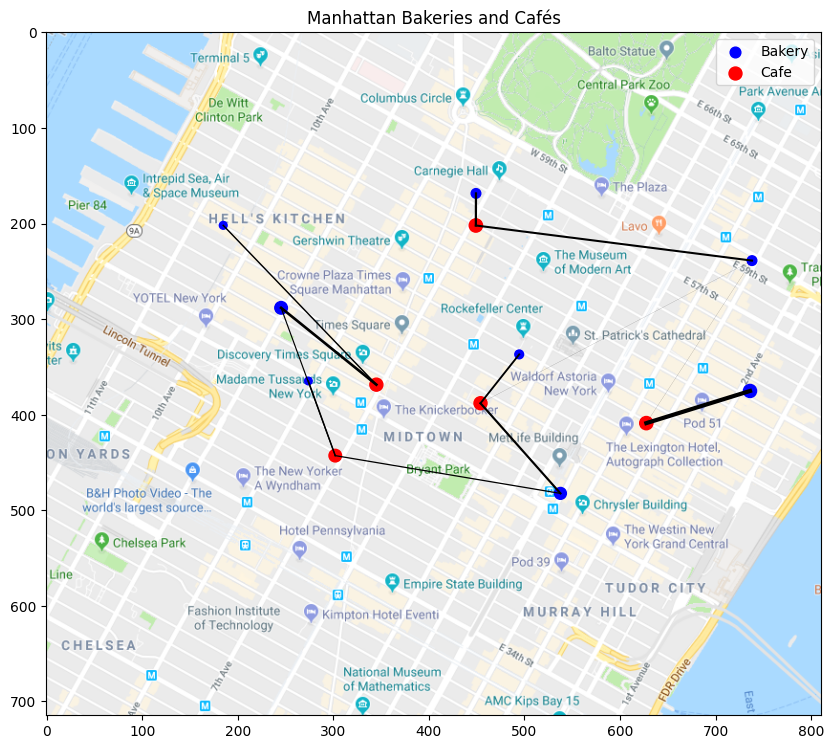

In [21]:
# Hàm bổ trợ lấy các vị trí trong biến x từ một tiệm bánh định sẵn tới tất cả các tiệm cafe
def b_to_all_c(label_list, bakery_code):
    return [label_list.index(label) for label in label_list if bakery_code in label[:2]]
# Hàm bổ trợ lấy các vị trí trong biến x tất cả các tiệm bánh đến một tiệm cafe định sẵn
def all_b_to_c(label_list, cafe_code):
    return [label_list.index(label) for label in label_list if cafe_code in label[3:]]

# TODO: Quy định biến, quy định integer vì số bánh là số nguyên
x = cp.Variable(shape=len(c), integer=True)

# TODO: Quy định hàm mục tiêu
objective = cp.Minimize(x.T @ c)

# TODO: Thêm các điều kiện ràng buộcc
constraints = [
    # Đảm bảo số bánh đến các quán cafe không quá số lượng bánh ở mỗi tiệm bánh
    cp.sum(x[b_to_all_c(label_list, 'b1')]) <= bakery_prod[0],
    cp.sum(x[b_to_all_c(label_list, 'b2')]) <= bakery_prod[1],
    cp.sum(x[b_to_all_c(label_list, 'b3')]) <= bakery_prod[2],
    cp.sum(x[b_to_all_c(label_list, 'b4')]) <= bakery_prod[3],
    cp.sum(x[b_to_all_c(label_list, 'b5')]) <= bakery_prod[4],
    cp.sum(x[b_to_all_c(label_list, 'b6')]) <= bakery_prod[5],
    cp.sum(x[b_to_all_c(label_list, 'b7')]) <= bakery_prod[6],
    cp.sum(x[b_to_all_c(label_list, 'b8')]) <= bakery_prod[7],
    # Đảm bảo các quán cafe đủ số bánh bán ra
    cp.sum(x[all_b_to_c(label_list, 'c1')]) >= cafe_prod[0],
    cp.sum(x[all_b_to_c(label_list, 'c2')]) >= cafe_prod[1],
    cp.sum(x[all_b_to_c(label_list, 'c3')]) >= cafe_prod[2],
    cp.sum(x[all_b_to_c(label_list, 'c4')]) >= cafe_prod[3],
    cp.sum(x[all_b_to_c(label_list, 'c5')]) >= cafe_prod[4],
    # Đảm bảo tất cả các biến >= 0
    x >= 0
]

# TODO: Giải bài toán tối ưu
problem = cp.Problem(objective, constraints)
optimal = problem.solve()

# In ra kết quả
print("Chi phí vận chuyển tối ưu:", optimal)
print("Đường đi tối ưu:")
for i in range(len(x.value)):
    if x.value[i] > 0:
        print('Tiệm bánh ' + label_list[i][1:2] + ' đến quán cafe ' + label_list[i][4:] + ' ' + str(int(x.value[i])) + ' bánh')

# vẽ các tiệm cafe và bánh trên bản đồ.
# Kích cỡ của điểm tròn biểu thị sản lượng bánh được làm/bán
# Độ đậm nhạt của đường thẳng biểu thị số bánh được giao
x_value = x.value.reshape((len(bakery_pos), len(cafe_pos)))
plt.figure(figsize=(10, 10))
plt.imshow(data['Imap'], interpolation='bilinear')
plt.scatter(bakery_pos[:,0], bakery_pos[:,1], color='b', s=bakery_prod)
plt.scatter(cafe_pos[:,0], cafe_pos[:,1], color='r', s=cafe_prod)
for i in range(len(bakery_pos)):
    for j in range(len(cafe_pos)):
        plt.plot([bakery_pos[i, 0], cafe_pos[j, 0]], [bakery_pos[i, 1], cafe_pos[j, 1]],
                '-k', lw=3. * x_value[i, j] / x.value.max())
plt.legend(['Bakery', 'Cafe'])
plt.title('Manhattan Bakeries and Cafés')

#### Giải bài toán bằng ma trận mục tiêu

Chi phí vận chuyển tối ưu: 61523.159712782486
Đường đi tối ưu:
Tiệm bánh 1 đến quán cafe 3 25 bánh
Tiệm bánh 1 đến quán cafe 4 30 bánh
Tiệm bánh 2 đến quán cafe 3 27 bánh
Tiệm bánh 2 đến quán cafe 4 31 bánh
Tiệm bánh 3 đến quán cafe 1 57 bánh
Tiệm bánh 4 đến quán cafe 3 48 bánh
Tiệm bánh 5 đến quán cafe 2 44 bánh
Tiệm bánh 6 đến quán cafe 4 40 bánh
Tiệm bánh 6 đến quán cafe 5 2 bánh
Tiệm bánh 7 đến quán cafe 2 46 bánh
Tiệm bánh 8 đến quán cafe 3 2 bánh
Tiệm bánh 8 đến quán cafe 4 89 bánh


Text(0.5, 1.0, 'Manhattan Bakeries and Cafés')

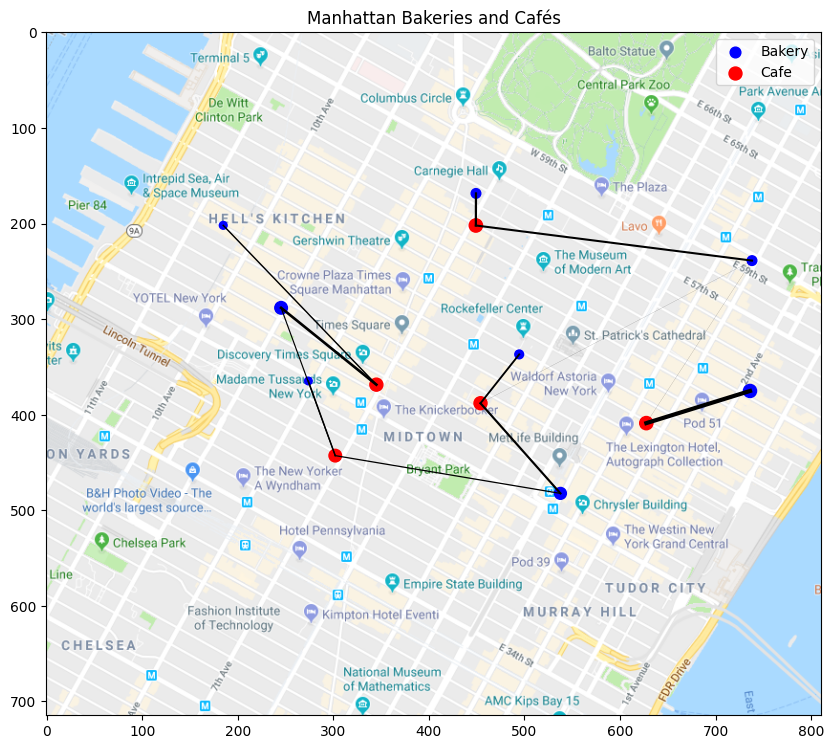

In [16]:
# TODO: Quy định biến, quy định integer vì số bánh là số nguyên
x = cp.Variable((len(bakery_pos), len(cafe_pos)), integer=True)

# TODO: Quy định hàm mục tiêu
objective = cp.Minimize(cp.sum(cp.multiply(cost_matrix, x)))

# TODO: Thêm các điều kiện ràng buộcc
constraints = [
    cp.sum(x, axis=1) <= bakery_prod,   # Đảm bảo số bánh đến các quán cafe không quá số lượng bánh ở mỗi tiệm bánh
    cp.sum(x, axis=0) >= cafe_prod,     # Đảm bảo các quán cafe đủ số bánh bán ra
    x >= 0                              # Đảm bảo tất cả các biến >= 0
]

# TODO: Giải bài toán tối ưu
problem = cp.Problem(objective, constraints)
problem.solve()

# In ra kết quả
print("Chi phí vận chuyển tối ưu:", optimal)
print("Đường đi tối ưu:")
for i in range(len(x.flatten().value)):
    if x.flatten().value[i] > 0:
        print('Tiệm bánh ' + label_list[i][1:2] + ' đến quán cafe ' + label_list[i][4:] + ' ' + str(int(x.flatten().value[i])) + ' bánh')

# vẽ các tiệm cafe và bánh trên bản đồ.
# Kích cỡ của điểm tròn biểu thị sản lượng bánh được làm/bán
# Độ đậm nhạt của đường thẳng biểu thị số bánh được giao
plt.figure(figsize=(10, 10))
plt.imshow(data['Imap'], interpolation='bilinear')
plt.scatter(bakery_pos[:,0], bakery_pos[:,1], color='b', s=bakery_prod)
plt.scatter(cafe_pos[:,0], cafe_pos[:,1], color='r', s=cafe_prod)
for i in range(len(bakery_pos)):
    for j in range(len(cafe_pos)):
        plt.plot([bakery_pos[i, 0], cafe_pos[j, 0]], [bakery_pos[i, 1], cafe_pos[j, 1]],
                '-k', lw=3. * x.value[i, j] / x.value.max())
plt.legend(['Bakery', 'Cafe'])
plt.title('Manhattan Bakeries and Cafés')